In [1]:
import random
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
elements = [' ', #пустое простарнство
            '@', #игрок
            '.', #пол
            '#', #стена
            'x', #выход с уровня
            '%', #ломающаяся стена
           ]

In [3]:
# arr = []

# with open("../floors/first_floor.txt", "w") as file:
#     for __ in range(1024//16):
#         arr_line = []
#         for _ in range(1024//16):
#             ind = random.randint(0, elements.__len__() - 1)
#             arr_line += elements[ind]
#         arr += arr_line
#         print(*arr_line, file=file, sep = '')

In [4]:
from generate_maze import create_maze


In [5]:
def show(img):
    fig = plt.imshow(img, 'gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    #plt.savefig('maze2.png')
    plt.show()

56 56


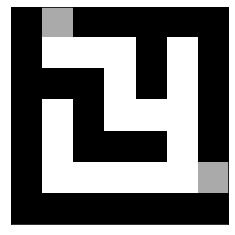

In [27]:
lago = create_maze(3, 3)
padding = 8
img = lago.return_img(padding=padding)
show(img)

In [28]:
line = np.zeros(shape = ( 56))
col = np.zeros(shape = (57, 1))
img = np.vstack((img, line))
img = np.hstack((img, col))

In [32]:
def good_pixel(i, j, h, w):
    new_padding = padding
    if (padding > 3):
        new_padding = 3;
    if i > new_padding - 1 and i < h - new_padding and j > new_padding - 1 and j < w - new_padding:
        return True
    else:
        return False

In [33]:
converter = {
    0: '#',
    255: '.',
    170: 'x',
    177: '@',
    100: '%',
}
walls = [0, 100]
weights = [0.8, 0.04]
#random.choices(walls, weights)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 0 and good_pixel(i, j, img.shape[0], img.shape[1]):
            img[i, j] = random.choices(walls, weights)[0]
            if img[i, j] == 100:
                for k in range(i - 2, i + 2):
                    for q in range(j - 2, j + 2):
                        if img[k, q] == 0 and good_pixel(k, q, img.shape[0], img.shape[1]):
                            img[k, q] = 100
                
            

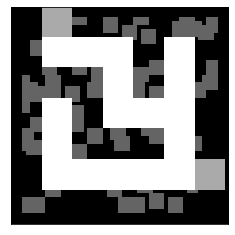

In [34]:
show(img)

In [35]:
with open("../floors/second_floor.txt", "w") as file:
    pict = img.copy()
    for i in range(pict.shape[0]):
        arr_line = []
        for j in range(pict.shape[1]):
            try:
                arr_line.append(converter[pict[i, j]])
            except:
                print(pict[i, j])

        print(*arr_line, file=file, sep = '')
                